# Линейные классификаторы
КБ-211 Коренев Денис

**Задание:** Построить линейную дискриминантную функцию Фишера для классификации на два класса. Разбивку на классы сделать  по столбцу "правильных ответов". Если этот столбец непонятно как определить (можно спросить о нем у преподавателя), то использовать  разбиение на 2 кластера в задании 2 или 3. Классификацию проводить по всем признакам, а для визуализации использовать два наиболее значимых или главные компоненты из задания 3. В этом задании не использовать готовые функции дискриминантного анализа из библиотек языка Пайтона (вспомогательные функции использовать можно и нужно). Обязательно нужна оценка качества классификации (accuracy, precision, recall, F1). Для оценки качества нужно использовать при обучении только часть размеченных данных, а остальные использовать для тестирования.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

## 1. Загрузка и подготовка данных

Используем датасет `maleorfemale.csv` и получаем разметку из кластеризации задания 2.


In [2]:
# Загрузка данных
df = pd.read_csv(r'data/02/maleorfemale.csv', nrows=100000)

print(f"Размер датасета: {df.shape}")
print("\nИнформация о данных:")
print(df.info())

# Подготовка признаков и разметки
label_column = None
for col in df.columns:
    if "cardio" in col.lower():
        label_column = col
        break

if label_column is None:
    obj_cols = df.select_dtypes(include=['object']).columns
    label_column = obj_cols[-1] if len(obj_cols) else None

print(f"\nСтолбец разметки: {label_column}")
labels = df[label_column]

# Признаки: все числовые, исключаем id и столбец разметки
exclude_cols = set([c for c in [label_column, 'id'] if c in df.columns])
feature_cols = [c for c in df.select_dtypes(
    include=[np.number]).columns if c not in exclude_cols]
X = df[feature_cols].values

print(f"Число признаков: {len(feature_cols)}")

Размер датасета: (70000, 13)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None

Столбец разметки: cardio
Число признаков: 11


## 2. Стандартизация и получение разметки из кластеризации


In [3]:
# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Получаем разметку из кластеризации (K-Means, k=2) задания 2
# kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
# y_clusters = kmeans.fit_predict(X_scaled)

y_clusters = labels.values

print(f"\nРазметка из кластеризации задания 2:")
print(f"Класс 0: {np.sum(y_clusters == 0)} объектов")
print(f"Класс 1: {np.sum(y_clusters == 1)} объектов")


# Используем разметку из кластеризации в качестве целевой переменной
y = y_clusters


Разметка из кластеризации задания 2:
Класс 0: 35021 объектов
Класс 1: 34979 объектов


## 3. Разделение на обучающую и тестовую выборки


In [4]:
# Разделяем данные на обучающую и тестовую выборки (70-30)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"\nРаспределение классов в обучающей выборке:")
print(f"  Класс 0: {np.sum(y_train == 0)}")
print(f"  Класс 1: {np.sum(y_train == 1)}")
print(f"\nРаспределение классов в тестовой выборке:")
print(f"  Класс 0: {np.sum(y_test == 0)}")
print(f"  Класс 1: {np.sum(y_test == 1)}")
print(
    f"\nДисбаланс: Класс 0 в ~{np.sum(y_train == 0) / np.sum(y_train == 1):.1f} раз больше")

Размер обучающей выборки: (49000, 11)
Размер тестовой выборки: (21000, 11)

Распределение классов в обучающей выборке:
  Класс 0: 24515
  Класс 1: 24485

Распределение классов в тестовой выборке:
  Класс 0: 10506
  Класс 1: 10494

Дисбаланс: Класс 0 в ~1.0 раз больше


## 4. Реализация линейной дискриминантной функции Фишера

Построим дискриминантную функцию Фишера вручную без использования готовой LDA из sklearn.


In [ ]:
class FisherLDA:
    """
    Линейная дискриминантная функция Фишера для двух классов.
    """

    def __init__(self):
        self.w = None  # вектор весов (дискриминантные коэффициенты)
        self.w0 = None  # смещение (intercept)
        self.mean_0 = None  # среднее 1-го класса
        self.mean_1 = None  # среднее 2-го класса
        self.priors = None  # априорные вероятности классов

    def fit(self, X, y):
        """
        Обучение модели на данных.

        Алгоритм Фишера:
        1. Вычислить средние векторы m0 и m1 для каждого класса
        2. Вычислить матрицы рассеяния внутри класса S_w и между классами S_b
        3. Найти оптимальный вес w как: w = S_w^(-1) * (m1 - m0)
        4. Вычислить смещение w0
        """

        # Разделить данные по классам
        X_0 = X[y == 0]
        X_1 = X[y == 1]

        n_0 = X_0.shape[0]
        n_1 = X_1.shape[0]
        n_total = X.shape[0]

        # Вычислить средние векторы
        self.mean_0 = np.mean(X_0, axis=0)
        self.mean_1 = np.mean(X_1, axis=0)

        # Вычислить априорные вероятности
        self.priors = np.array([n_0 / n_total, n_1 / n_total])

        # Вычислить матрицы рассеяния внутри класса
        S_0 = np.cov(X_0.T)  # ковариационная матрица класса 0
        S_1 = np.cov(X_1.T)  # ковариационная матрица класса 1

        # Матрица рассеяния внутри класса (pooled covariance matrix)
        S_w = S_0 + S_1

        # Вычислить вектор весов w
        try:
            S_w_inv = np.linalg.inv(S_w)
            self.w = S_w_inv @ (self.mean_1 - self.mean_0)
        except np.linalg.LinAlgError:
            # Если матрица сингулярна, используем псевдообратную
            S_w_inv = np.linalg.pinv(S_w)
            self.w = S_w_inv @ (self.mean_1 - self.mean_0)

        # Вычислить смещение w0
        # w0 = -0.5 * w^T * (m0 + m1) + log(p1/p0)
        self.w0 = -0.5 * (self.mean_0 + self.mean_1) @ self.w + \
            np.log(self.priors[1] / self.priors[0])

        return self

    def decision_function(self, X):
        """
        Вычислить дискриминантную функцию.
        f(x) = w^T * x + w0
        """
        return X @ self.w + self.w0

    def predict(self, X):
        """
        Предсказать классы.
        Класс 0 если f(x) < 0, класс 1 если f(x) >= 0
        """
        return (self.decision_function(X) >= 0).astype(int)

    def predict_proba(self, X):
        """
        Вычислить вероятности принадлежности к классам.
        Используется сигмоидная функция для преобразования дискриминантной функции.
        """
        decision = self.decision_function(X)
        # Сигмоидная функция: 1 / (1 + exp(-x))
        proba_1 = 1.0 / (1.0 + np.exp(-decision))
        proba_0 = 1.0 - proba_1
        return np.column_stack([proba_0, proba_1])


# Обучаем модель
print("Обучение модели Фишера...")
fisher = FisherLDA()
fisher.fit(X_train, y_train)

print("\nПараметры модели:")
print(
    f"Средний вектор класса 0: {fisher.mean_0[:5]} ... (показаны первые 5 признаков)")
print(
    f"Средний вектор класса 1: {fisher.mean_1[:5]} ... (показаны первые 5 признаков)")
print(f"Вектор весов w (первые 5): {fisher.w[:5]} ...")
print(f"Смещение w0: {fisher.w0:.6f}")
print(f"Норма вектора w: {np.linalg.norm(fisher.w):.6f}")

Обучение модели Фишера...

Параметры модели:
Средний вектор класса 0: [-0.24487992 -0.0069073   0.01300499 -0.17918772 -0.05236564] ... (показаны первые 5 признаков)
Средний вектор класса 1: [ 0.24266191  0.00571665 -0.01438494  0.18562885  0.05941055] ... (показаны первые 5 признаков)
Вектор весов w (первые 5): [ 0.2344137   0.02253013 -0.04545294  0.1768892   0.03913556] ...
Смещение w0: -0.001624
Норма вектора w: 0.370729

Параметры модели:
Средний вектор класса 0: [-0.24487992 -0.0069073   0.01300499 -0.17918772 -0.05236564] ... (показаны первые 5 признаков)
Средний вектор класса 1: [ 0.24266191  0.00571665 -0.01438494  0.18562885  0.05941055] ... (показаны первые 5 признаков)
Вектор весов w (первые 5): [ 0.2344137   0.02253013 -0.04545294  0.1768892   0.03913556] ...
Смещение w0: -0.001624
Норма вектора w: 0.370729


## 5. Предсказание и оценка качества классификации


In [6]:
# Предсказания на тестовой выборке
y_pred = fisher.predict(X_test)
y_pred_train = fisher.predict(X_train)

# Вычисляем метрики качества
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

# Матрица ошибок
cm_test = confusion_matrix(y_test, y_pred)

print("=" * 70)
print("ОЦЕНКА КАЧЕСТВА КЛАССИФИКАЦИИ")
print("=" * 70)

print("\nМетрики на обучающей выборке:")
print(f"  Accuracy:  {accuracy_train:.4f}")
print(f"  Precision: {precision_train:.4f}")
print(f"  Recall:    {recall_train:.4f}")
print(f"  F1-Score:  {f1_train:.4f}")

print("\nМетрики на тестовой выборке:")
print(f"  Accuracy:  {accuracy_test:.4f}")
print(f"  Precision: {precision_test:.4f}")
print(f"  Recall:    {recall_test:.4f}")
print(f"  F1-Score:  {f1_test:.4f}")

print("\nМатрица ошибок на тестовой выборке:")
print(cm_test)

print("\nДетальный отчет классификации на тестовой выборке:")
print(classification_report(y_test, y_pred, target_names=['Класс 0', 'Класс 1']))


ОЦЕНКА КАЧЕСТВА КЛАССИФИКАЦИИ

Метрики на обучающей выборке:
  Accuracy:  0.6498
  Precision: 0.6601
  Recall:    0.6169
  F1-Score:  0.6378

Метрики на тестовой выборке:
  Accuracy:  0.6410
  Precision: 0.6515
  Recall:    0.6052
  F1-Score:  0.6275

Матрица ошибок на тестовой выборке:
[[7109 3397]
 [4143 6351]]

Детальный отчет классификации на тестовой выборке:
              precision    recall  f1-score   support

     Класс 0       0.63      0.68      0.65     10506
     Класс 1       0.65      0.61      0.63     10494

    accuracy                           0.64     21000
   macro avg       0.64      0.64      0.64     21000
weighted avg       0.64      0.64      0.64     21000



## 6. Анализ значимости признаков


Топ-10 наиболее значимых признаков (по абсолютному значению коэффициента):
  1. age                            :   0.234414
  2. cholesterol                    :   0.203370
  3. weight                         :   0.176889
  4. ap_lo                          :   0.056523
  5. height                         :  -0.045453
  6. ap_hi                          :   0.039136
  7. active                         :  -0.034779
  8. gluc                           :  -0.028840
  9. gender                         :   0.022530
  10. alco                           :  -0.016501


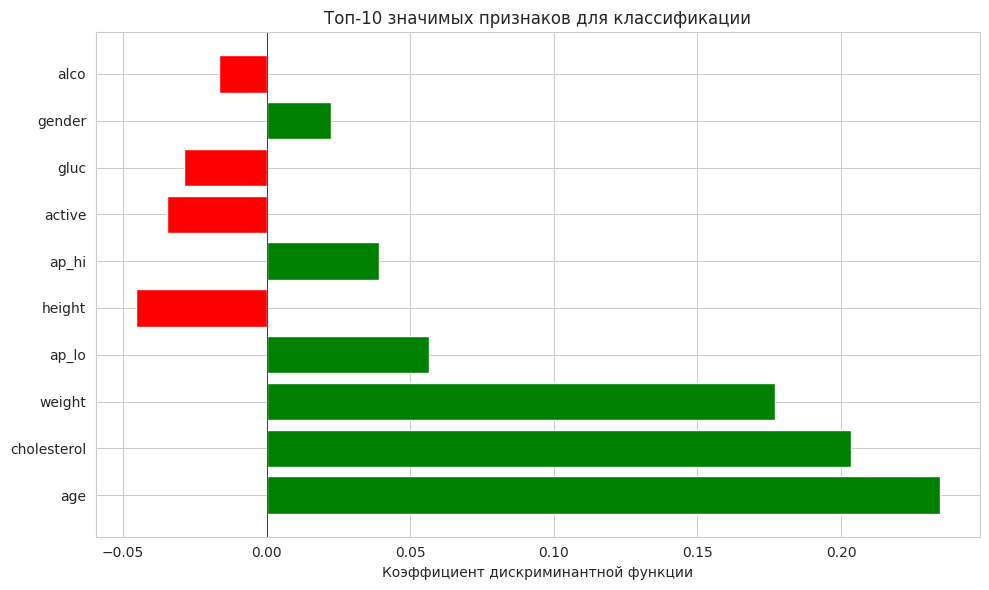

In [7]:
# Анализ значимости признаков по коэффициентам w
weights_abs = np.abs(fisher.w)
top_indices = np.argsort(weights_abs)[-10:][::-1]
top_features = [feature_cols[i] for i in top_indices]
top_weights = fisher.w[top_indices]

print("Топ-10 наиболее значимых признаков (по абсолютному значению коэффициента):")
for i, (feat, weight) in enumerate(zip(top_features, top_weights)):
    print(f"  {i+1}. {feat:30s} : {weight:10.6f}")

# Визуализация значимости признаков
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(top_features))
ax.barh(y_pos, top_weights, color=['green' if w > 0 else 'red' for w in top_weights])
ax.set_yticks(y_pos)
ax.set_yticklabels(top_features)
ax.set_xlabel('Коэффициент дискриминантной функции')
ax.set_title('Топ-10 значимых признаков для классификации')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()


## 7. Визуализация классификации в пространстве главных компонент (PCA)

Используем две главные компоненты для визуализации результатов классификации.


PCA - Объясненная дисперсия:
  PC1: 0.1899
  PC2: 0.1532
  Суммарно: 0.3431


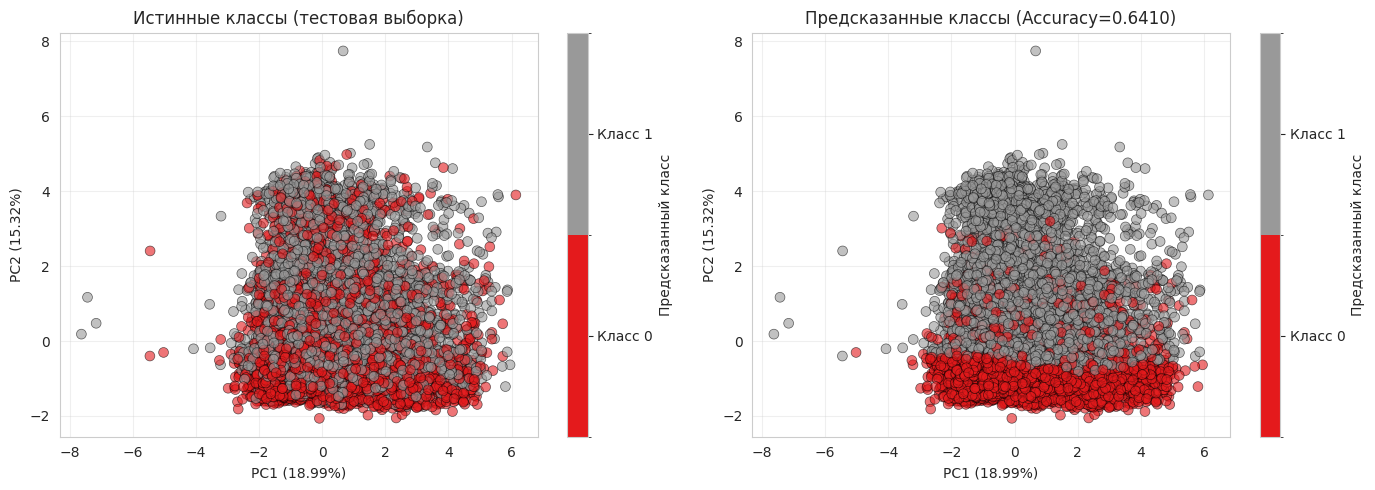

In [8]:
from matplotlib.colors import BoundaryNorm

# Применяем PCA для визуализации
pca = PCA(n_components=2, random_state=42)
X_test_pca = pca.fit_transform(X_test)
X_train_pca = pca.transform(X_train)

print(f"PCA - Объясненная дисперсия:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"  Суммарно: {pca.explained_variance_ratio_.sum():.4f}")

# Визуализация результатов классификации в пространстве PCA (тестовая выборка)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Истинные классы на тесте
scatter1 = axes[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, 
                           cmap='Set1', s=50, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
axes[0].set_title('Истинные классы (тестовая выборка)')
axes[0].grid(True, alpha=0.3)

cmap2 = plt.cm.get_cmap('Set1', 2)
norm = BoundaryNorm(boundaries=[-0.5, 0.5, 1.5], ncolors=2)
sm = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axes[0], ticks=[0, 1], boundaries=[-0.5, 0.5, 1.5])
cbar.set_label('Предсказанный класс')
cbar.ax.set_yticklabels(['Класс 0', 'Класс 1'])

# Предсказанные классы на тесте
scatter2 = axes[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, 
                           cmap='Set1', s=50, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
axes[1].set_title(f'Предсказанные классы (Accuracy={accuracy_test:.4f})')
axes[1].grid(True, alpha=0.3)

cmap2 = plt.cm.get_cmap('Set1', 2)
norm = BoundaryNorm(boundaries=[-0.5, 0.5, 1.5], ncolors=2)
sm = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axes[1], ticks=[0, 1], boundaries=[-0.5, 0.5, 1.5])
cbar.set_label('Предсказанный класс')
cbar.ax.set_yticklabels(['Класс 0', 'Класс 1'])

plt.tight_layout()
plt.show()


## 8. Визуализация граничной гиперплоскости в пространстве PCA

Визуализируем разделяющую гиперплоскость дискриминантной функции Фишера.


Вектор весов w в пространстве PCA: [0.06470898 0.66359523]


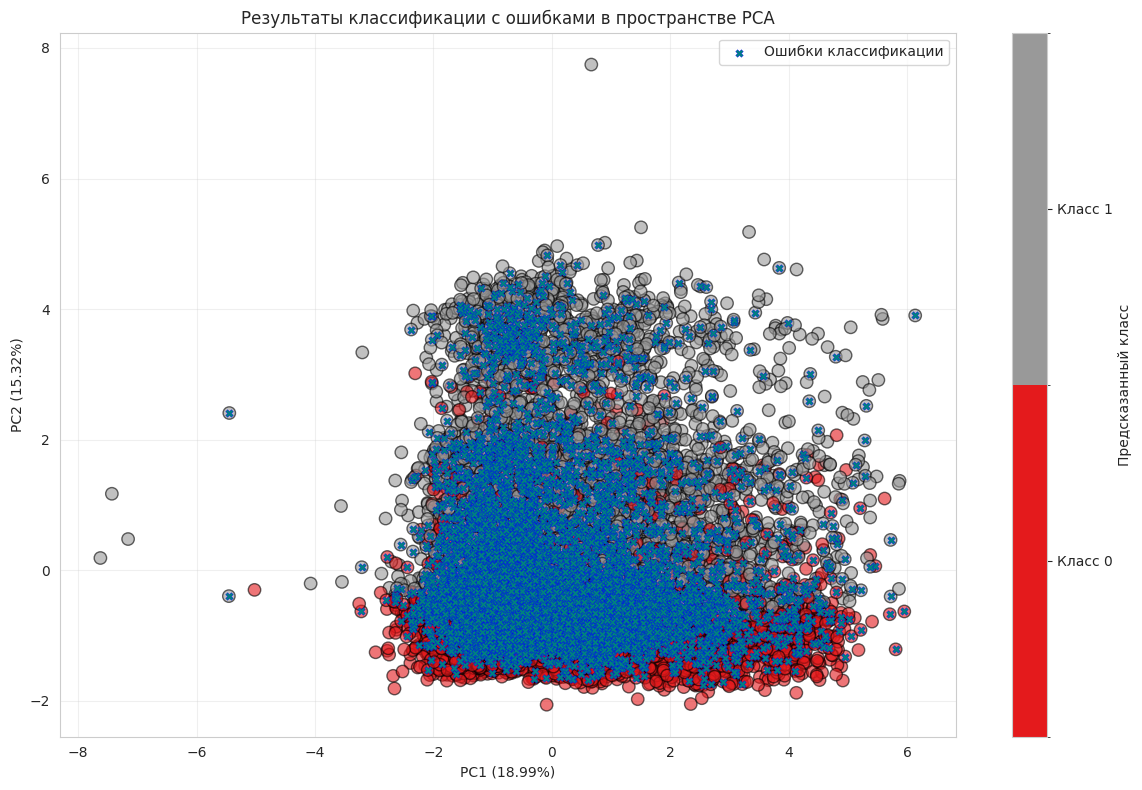


Количество ошибок: 7540 из 21000


In [9]:
from matplotlib.colors import BoundaryNorm

# Для визуализации разделяющей гиперплоскости нужно:
# 1. Спроецировать вектор весов w на пространство PCA
# 2. Построить сетку в пространстве PCA
# 3. Предсказать классы на сетке

# Проецируем весовой вектор в пространство PCA
# Сначала нормализуем w для наглядности
w_normalized = fisher.w / np.linalg.norm(fisher.w)
w_pca = pca.transform(w_normalized.reshape(1, -1))
print(f"Вектор весов w в пространстве PCA: {w_pca[0]}")

# Создаем сетку для визуализации
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Обратное преобразование из PCA в исходное пространство для предсказания
X_mesh = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, 
                     cmap='Set1', s=80, alpha=0.6, edgecolors='k', linewidth=1)

# Отметим неправильные предсказания символом 'X'
errors = y_pred != y_test
if errors.sum() > 0:
    ax.scatter(X_test_pca[errors, 0], X_test_pca[errors, 1], 
               marker='X', s=30, c='teal', edgecolors='blue', linewidth=0.25, 
               label='Ошибки классификации')

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
ax.set_title('Результаты классификации с ошибками в пространстве PCA')

ax.grid(True, alpha=0.3)
cmap2 = plt.cm.get_cmap('Set1', 2)
norm = BoundaryNorm(boundaries=[-0.5, 0.5, 1.5], ncolors=2)
sm = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, ticks=[0, 1], boundaries=[-0.5, 0.5, 1.5])
cbar.set_label('Предсказанный класс')
cbar.ax.set_yticklabels(['Класс 0', 'Класс 1'])

if errors.sum() > 0:
    ax.legend()
plt.tight_layout()
plt.show()

print(f"\nКоличество ошибок: {errors.sum()} из {len(y_test)}")


## 9. Тепловая карта матрицы ошибок


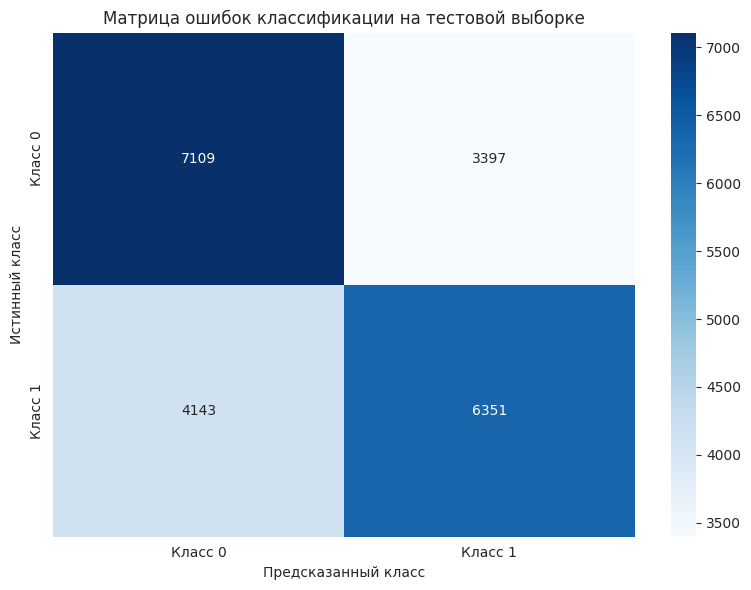


Дополнительные метрики из матрицы ошибок:
  True Negatives (TN):  7109
  False Positives (FP): 3397
  False Negatives (FN): 4143
  True Positives (TP):  6351
  Specificity:          0.6767
  Sensitivity:          0.6052


In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=True, ax=ax,
            xticklabels=['Класс 0', 'Класс 1'],
            yticklabels=['Класс 0', 'Класс 1'])
ax.set_xlabel('Предсказанный класс')
ax.set_ylabel('Истинный класс')
ax.set_title('Матрица ошибок классификации на тестовой выборке')
plt.tight_layout()
plt.show()

# Из матрицы ошибок
tn, fp, fn, tp = cm_test.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

print(f"\nДополнительные метрики из матрицы ошибок:")
print(f"  True Negatives (TN):  {tn}")
print(f"  False Positives (FP): {fp}")
print(f"  False Negatives (FN): {fn}")
print(f"  True Positives (TP):  {tp}")
print(f"  Specificity:          {specificity:.4f}")
print(f"  Sensitivity:          {sensitivity:.4f}")


# Общий вывод по работе

В данной работе была реализована линейная дискриминантная функция Фишера для классификации данных о сердечно-сосудистых заболеваниях. Реализация включала:

1. **Предобработку данных**: стандартизация признаков и разделение на обучающую и тестовую выборки (70%/30%).

2. **Собственную реализацию алгоритма Фишера**:  
   - Вычисление внутриклассовых матриц ковариации $S_1$ и $S_2$
   - Вычисление объединенной внутриклассовой матрицы $S_W = S_1 + S_2$
   - Расчет вектора весов $\mathbf{w} = S_W^{-1}(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_0)$
   - Нахождение порога классификации как середины между проекциями центроидов
   - Классификация: объект относится к классу 1, если $\mathbf{w}^T\mathbf{x} + w_0 \geq 0$

## Результаты классификации

Модель показала умеренные результаты на обеих выборках:

- **Точность (Accuracy)**: 64.10% на тестовой выборке
- **Полнота (Recall)**: 60.52% для класса 1  
- **Точность предсказаний (Precision)**: 65.15% для класса 1
- **F1-Score**: 0.6275

Матрица ошибок показывает, что:
- Класс 0: TN = 7109, FP = 3397 (67.67% правильно классифицированы)
- Класс 1: TP = 6351, FN = 4143 (60.52% правильно классифицированы)

**Общее количество ошибок**: 7540 из 21000 (35.90%)

## Анализ значимости признаков

Наиболее значимые признаки для классификации (по абсолютному значению коэффициента):
1. **age** (возраст): коэффициент 0.234 — наибольший вклад в разделение классов
2. **cholesterol** (холестерин): 0.203 — важный фактор риска
3. **weight** (вес): 0.177 — значимый признак

Положительные коэффициенты для возраста, холестерина и веса указывают на то, что увеличение их значений повышает вероятность отнесения к классу 1 (наличие заболевания).

## Визуализация результатов

Применение метода главных компонент (PCA) позволило представить результаты классификации в двумерном пространстве. Две главные компоненты объясняют 34.53% общей дисперсии данных (PC1: 18.99%, PC2: 15.32%). Визуализация показывает:

- Значительное перекрытие классов в пространстве PC1-PC2, что объясняет относительно умеренную точность классификации
- 7540 ошибок на тестовой выборке распределены по всей области перекрытия классов
- Линейное разделение не способно полностью захватить сложность границы между классами

## Качество обучения

Близкие показатели на обучающей (64.98%) и тестовой (64.10%) выборках свидетельствуют об отсутствии переобучения. Однако общая точность классификации составляет около 64%, что указывает на следующие ограничения:

1. **Линейная разделимость данных ограничена**: классы существенно перекрываются в пространстве признаков
3. **Возможна необходимость дополнительных признаков**: текущий набор признаков может быть недостаточным для качественного разделения классов

## Вывод

Реализованная линейная дискриминантная функция Фишера демонстрирует умеренное качество классификации (64.10% на тестовой выборке) для данных о сердечно-сосудистых заболеваниях. Алгоритм работает стабильно (отсутствует переобучение), но ограничен линейной природой модели. 

Значительное перекрытие классов в пространстве признаков (35.90% ошибок) свидетельствует о том, что для достижения более высокого качества классификации на этом датасете потребуются более сложные нелинейные методы.